In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris
import pandas as pd

In [6]:
iris = load_iris()

In [7]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
df['target'] = iris.target

In [16]:
df['flower_name'] = df['target'].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [17]:
df0 = df[df['target'] == 0]
df1 = df[df['target'] == 1]
df2 = df[df['target'] == 2]

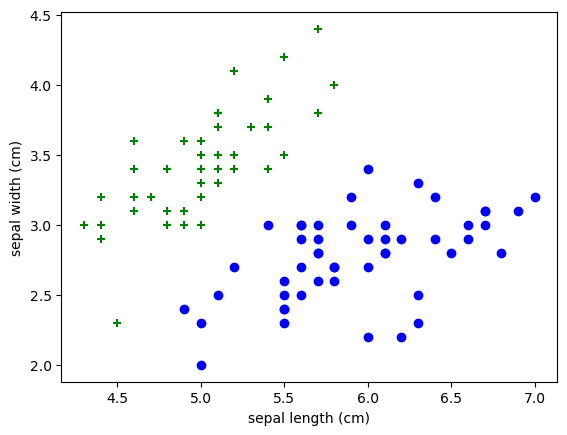

In [21]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue')

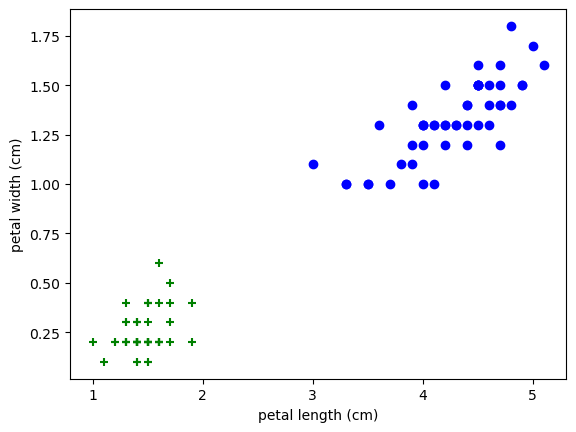

In [24]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue')

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = df.drop(columns=['target', 'flower_name'])
y = df['target']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [44]:
from sklearn.svm import SVC
model = SVC()

In [45]:
model.fit(X_train, y_train)

SVC()

In [46]:
model.score(X_test, y_test)

1.0

In [48]:
model.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])